---
title: "Modeling a Coin Flip Game"
author: "Josh Pearlson"
date: "2024-08-16"
categories: [python, probability]
css: style.css
---

A casino offers a game: Flip a coin as long as you want. Your prize is the ratio of heads to total flips. What's your strategy to maximize your winnings?

## Coin Flip Game

Imagine you're in a casino, instead of slot machines or table games you are offered a coin game. He explains the rules: 

> I will pay you based on the outcome of a coin flip game. You can flip the coin as **many times as you want**, and you can **stop whenever you like**. I will pay you based on the ratio of heads to total flips. I will **charge you 75 cents to play** and **pay you your heads to total flips ratio in cents**. Would you like to play? 

At first glance it appears the casino is offering us a losing wager (as is typical). In any long-run scenario you would expect to get a ratio of 1/2 heads to total flips, since heads and tails are equally likely to occur on any given flip. In that case, we would be paying 75 cents to play a game where we would only be getting paid 50 (1 heads for every 1 tails) cents! While this may seem like a losing game at first, we will suspend our intuition and allow for logic to guide our decision making. In the end, we will learn about the value of optionality and how it is used to our advantage in this game.

##  Basic Strategy

First, let's review the problem: We have a fair coin (50% heads, 50% tails) and we can flip it as many times as we want. Our goal is to maximize the ratio of heads to total flips.

First, we should think about a simplified case to get a better understanding of the game dynamics. We will create a decision tree to visualize our options following the outcome of the first flip:

``` 
Start Game
     |
     +-- Flip 1: Heads (50% chance)
     |     |
     |     +-- Ratio is 1.0 (1 head / 1 flip)
     |     +-- DECISION: STOP. This is the best possible ratio.
     |     +-- OUTCOME: Profit (1.0 payout > 0.75 cost)
     |
     +-- Flip 1: Tails (50% chance)
           |
           +-- Ratio is 0.0 (0 heads / 1 flip)
           +-- DECISION: CONTINUE. Stopping means a 0.0 payout.
                 |
                 +-- Keep flipping...
                 +-- Long-run ratio approaches 0.5
                 +-- OUTCOME: Loss (0.5 payout < 0.75 cost)
```
The key thing to note here is that when we flip heads on the first flip we win the game outright with the best possible payout ratio of 1.0 heads/total flips (giving us the game's maximum profit of 100 (payout) - 75 (cost) = 25 cents). However if we flip tails on the first flip we are in a losing situation where we will have to continue flipping, right now we will assume that we will just flip until we get the long-run ratio of 0.5 heads/total flips.

As you can see, based on the naive strategy I have outlined above we offer a lower bound on the expected value of this game itself. We have devised a strategy playing the game where half of the time we will win 25 cents (flipping heads on the first flip) and half of the time we will lose 25 cents (flipping tails on the first flip and continuing to the long-run ratio of 0.5 heads/total flips). Thus we can say that the expected value of this game is at least:

<div style="text-align: left;">
$$
\begin{aligned}
 EV_{game} &\geq  \\ 
 &\frac{1}{2} (1.0 - 0.75) + 
 \frac{1}{2} (0.5 - 0.75)  \\
 &= \frac{1}{2} (0.25) +
\frac{1}{2} (-0.25) \\
 &= \$0 
\end{aligned}
$$
</div>

If we wish to improve on this strategy we need to consider a new approach. What if we consider stopping at the first time that we see we have flipped heads more often than tails? 

### Stop When Heads > Tails Strategy 

I will create a table with the first couple of possible stopping points (locations where # heads > # tails) for this game: 

| Flip Sequence | Heads | Tails | Ratio (Heads/Total Flips) | Probability of sequence| 
|---------------|-------|-------|----------------------------|-------------------------|
| H             | 1     | 0     | 1.0                        | 1/2                    |
| T H H         | 2     | 1     | 0.67                       | 1/2 ^3                  |
| T T H H H     | 3     | 2     | 0.60                       | 1/2 ^5                  |
| T H T H H     | 3     | 2     | 0.60                       | 1/2 ^5                  |

From the table above we can see that if we stop at the first time we have more heads than tails we can achieve a ratio of 1.0, .67, .60, etc. Each stopping point is less and less likely, there is $\frac{1}{2}^{\text{\# total flips}}$ chance of achieving each outcome. However, we can see that the ratios we achieve are all greater than 0.5 heads/total flips. Another thing we notice is that the longer sequences clearly have many more paths (at much lower likelihoods) than the shorter sequences.

Let's plot the possible outcomes of this game to count the number of paths that lead to each outcome:


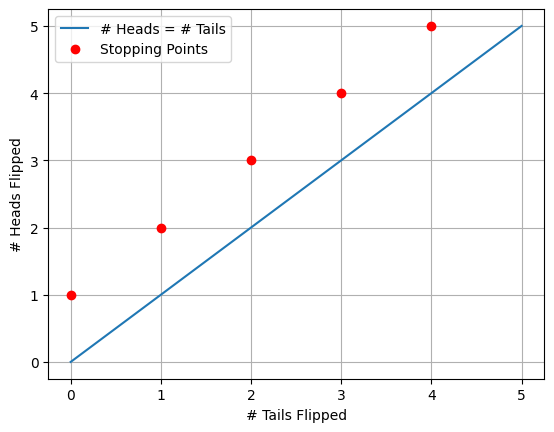

In [33]:
#| echo: false

import matplotlib.pyplot as plt

list = [i for i in range(6)]
plt.plot(list,list, label= '# Heads = # Tails')
plt.xlabel('# Tails Flipped')
plt.ylabel("# Heads Flipped")

plt.plot(0, 1, 'o', label='Stopping Points', color='red')
plt.plot(1, 2, 'o', color='red')
plt.plot(2, 3, 'o', color='red')
plt.plot(3, 4, 'o', color='red')
plt.plot(4, 5, 'o', color='red')

plt.grid()

plt.xticks(list)
plt.yticks(list)

plt.legend()
plt.show()

As we can see above, we have the blue line showing the threshold where the number of heads and tails flipped are equal. The red dots are showing us our stopping points, where we have flipped more heads than tails for the first time. Only valid paths from (0,0) to each red dot without crossing the blue line are possible outcomes of the strategy! We also know that each time we flip a coin N times our chance of getting one exact path is 1/2^N. Given this graphical representation we can now use combinatorics to count the number of paths that lead to each stopping point and multiply this by our probability of getting to that same path. 

For some arbitrary number k, we will stop when we have flipped k+1 heads and k tails. The total number of flips will be 2k+1 and our heads/total flips ratio will be (k+1)/(2k+1). 

The EV of this game can be calculated as the sum of each flips ratio multiplied by the probability of reaching that ratio minus the cost to play (75 cents). 

<div style="text-align: left;">
$$
\begin{aligned}
EV_{game} &= \sum_{k=0}^{\infty} \left( \frac{\text{Heads}}{\text{Total Flips}} \cdot P(k) \right) - 0.75 \\
EV_{game} &= \sum_{k=0}^{\infty} \left( \frac{k+1}{2k+1} \cdot P(k) \right) - 0.75 \\
\end{aligned}
$$
</div>

Ok, So how do we calculate P(k)? Enter, our graphical representation above! Here we can see that there are a number of paths that lead to each stopping point. However not all paths are valid, since some paths cross the blue line (where heads = tails) before reaching the stopping point. To calculate the number of valid paths to each stopping point we can use the ballot theorem from combinatorics.

> The [ballot theorem](https://en.wikipedia.org/wiki/Bertrand%27s_ballot_theorem) states that if in an election candidate A receives h votes and candidate B receives k votes with h>k, then the number of ways the votes can be counted such that A is always strictly ahead of B is given by:

<div style="text-align: left;">
$$
\begin{aligned}
\frac{h-k}{h+k} \binom{h+k}{k} \\
\end{aligned}
$$
</div>

A special case of this theorem is when h = k + 1, exceeding votes by exactly one. If we think back to path counting, this problem is equivalent to us counting paths where we stop when heads exceeds tails by exactly one! Let's now solve for this special case:

<div style="text-align: left;">
$$
\begin{aligned}
% & \frac{h-k}{h+k} \binom{h+k}{k} \\
& h = k + 1 \\
& \text{Substituting h for its new value of k + 1}  \\
& = \frac{(k+1)-k}{(k+1)+k} \binom{(k+1)+k}{k} \\
& = \frac{1}{2k+1} \binom{2k+1}{k} \\
& = \frac{1}{2k+1} \cdot \frac{(2k+1)!}{(k+1)! k!} \\
& (2k+1)! = (2k+1)(2k!) \\
& = \frac{1}{2k+1} \cdot \frac{(2k+1)(2k!)}{(k+1)! k!} \\
& = \frac{2k!}{(k+1)! k!} \\
& (k+1)! = (k+1)(k!) \\
& = \frac{2k!}{(k+1)(k!) k!} \\
& = \frac{1}{k+1} \cdot \frac{2k!}{k! k!} \\
& = \frac{1}{k+1} \binom{2k}{k} \\
\end{aligned}
$$
</div>

The sequence we have arrived at above is a very famous sequence in combinatorics called the [Catalan numbers](https://en.wikipedia.org/wiki/Catalan_number). Catalan numbers have many applications in combinatorial mathematics including counting valid parentheses expressions, counting rooted binary trees, and **counting paths in a grid that do not cross a diagonal line**. In our case we are using them to count the number of valid paths to each stopping point in our coin flip game. The number of paths to the k-th number stopping point (where num heads = k + 1 and num tails = k) happens to be the k-th Catalan number! 

Now that we have everything we need, Let's calculate the expected value of the stop when heads exceeds tails by one strategy.

### Calculating EV of Stop When Heads > Tails

Strategy: Let each stopping point k be defined as the first time # heads = k + 1 and # tails = k. In this game we are paid out based on the number of heads / total flips ratio at some stopping point k. As defined previously the value at the k-th stopping is (k + 1) / (2k + 1). The probability of reaching this stopping point is equal to the number of valid paths to this stopping point (equivalent to the kth Catalan number) multiplied by the probability of reaching any one path (1/2^(total flips) = (1/2 ^ (2k+1)). We also know trivially that the EV of the game is equal to the payout minus the cost to play the game (75 cents). First let's calculate the expected payout (EP) of this strategy: 

<div style="text-align: left;">
$$
\begin{aligned}
EP_{strategy} &= \sum_{k=0}^{\infty} \left( \frac{\text{Heads}}{\text{Total Flips}} \cdot P(k) \right) \\
EP_{strategy} &= \sum_{k=0}^{\infty} \left( \frac{k+1}{2k+1} \cdot P(k) \right) \\
P(k) &= C_k \cdot \left( \frac{1}{2} \right)^{2k+1} \\
EP_{strategy} &= \sum_{k=0}^{\infty} \left( \frac{k+1}{2k+1} \cdot C_k \cdot \left( \frac{1}{2} \right)^{2k+1} \right) \\
EP_{strategy} &= \sum_{k=0}^{\infty} \left( \frac{k+1}{2k+1} \cdot \frac{1}{k+1} \binom{2k}{k} \cdot \left( \frac{1}{2} \right)^{2k+1} \right) \\
EP_{strategy} &= \sum_{k=0}^{\infty} \left( \frac{1}{2k+1} \cdot \binom{2k}{k} \cdot \left( \frac{1}{2} \right)^{2k+1} \right) \\   
EP_{strategy} &= \sum_{k=0}^{\infty} \left( \frac{1}{2k+1} \cdot \frac{(2k)!}{(k!)^2} \cdot \left( \frac{1}{2} \right)^{2k+1} \right) \\
&\text{After further simplification we arrive at:} \\
EP_{strategy} &= \frac{1}{2} * \sum_{k=0}^{\infty} \left( \frac{\binom{2k}{k}}{4^k (2k+1)} \right) \\
\end{aligned}
$$
</div>

Here we rely on a clever mathematical result that states that the sum above is equal to the Taylor series expansion of arcsin(x) evaluated at x = 1. The result is as follows: 

<div style="text-align: left;">
$$
\begin{aligned}
\arcsin(x) &= \sum_{k=0}^{\infty} \left( \frac{\binom{2k}{k}}{4^k (2k+1)} x^{2k+1} \right) \\
\arcsin(1) &= \sum_{k=0}^{\infty} \left( \frac{\binom{2k}{k}}{4^k (2k+1)}  \right) \\
\arcsin(1) &= \frac{\pi}{2} \\
\frac{\pi}{2} &= \sum_{k=0}^{\infty} \left( \frac{\binom{2k}{k}}{4^k (2k+1)} \right)\\
EP_{strategy} &= \frac{1}{2} * \frac{\pi}{2} = \frac{\pi}{4} \approx 0.7854 \\ 
EV_{strategy} &= EP_{strategy} - \text{Cost to Play} \\
EV_{strategy} &= \frac{\pi}{4} - 0.75 \approx 0.0354 \\
\end{aligned}
$$
</div>


Amazing! We have now turned our break-even strategy into one that mathematically wins over time! By stopping the game at the first time we have flipped more heads than tails we can expect to win about 3.54 cents per game in the long-run. This would be a ROI of about 4.72% on each 75 cent wager!


## Strategy Improvement 

The 'stop when heads > tails' strategy clearly works, however, it seems like there could be a better strategy. What if we only accept a heads/total flips ratio of greater than 0.51, or 0.55, or 0.60? Could we do even better?

In this exploration two things interest me most:

1. What is the optimal policy for the 'stop when heads/total flips > X' strategy?
2. Is there a better policy that could outperform stop when 'heads/total flips > X'?

First, let's tackle modeling the 'stop when heads/total flips > X' strategy. I wrote a simple python simulation to model this game and test various stopping points. The code is as follows:

### Python Simulation for 'Stop When Heads/Total Flips > X' Strategy


In [1]:
# | echo: false
import random
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from datetime import datetime


In [ ]:
# | output: false
def run_numpy_simulation(num_simulations: int, max_flips: int, stop_ratio: float) -> float:
    flips = np.random.randint(
        0, # Inclusive lower bound
        2, # Exclusive upper bound
        size=(num_simulations, max_flips) # Number of simulations, number of flips per simulation
        )

    num_heads = np.cumsum(flips, axis=1) # Cumulative sum of heads along each row
    flip_numbers = np.arange(1, max_flips + 1) # Total flips 
    ratios = num_heads / flip_numbers # Ratio of heads to total flips
    exceeds_threshold = ratios > stop_ratio # Find where ratios exceeded the stop ratio
    first_exceed_indices = np.argmax(exceeds_threshold, axis=1) # Find the first time where this happened

    # If we never exceed, set the index to last flip
    never_exceeds = ~exceeds_threshold.any(axis=1)
    first_exceed_indices[never_exceeds] = max_flips - 1

    final_ratios = ratios[np.arange(num_simulations), first_exceed_indices] # Final ratios
    final_ratios[never_exceeds] = np.maximum(0.5, final_ratios[never_exceeds]) # Ensure min ratio of 0.5 (long-run average)
    return float(np.mean(final_ratios))

print("Running simulations...")
num_simulations = 2_000_000  # 2 million sims 
max_flips = 1000 # 1000 max flips per simulation

results = []
# Test a range of stop_ratios from 0.50 to 0.64
stop_ratios_to_test = np.arange(0.5, 0.64, 0.01)

for stop_ratio in stop_ratios_to_test:
    print(f"Simulating for stop ratio: {stop_ratio:.2f}...")
    avg_ratio = run_numpy_simulation(num_simulations, max_flips, stop_ratio)
    results.append({'Stop Ratio': round(stop_ratio, 2), 'Expected Payout': avg_ratio})
    print("="*50)

print("Simulations complete.")
# Results Dataframe! 
df_all_results = pd.DataFrame(results).set_index('Stop Ratio')

Running simulations...
Simulating for stop ratio: 0.50...
Simulating for stop ratio: 0.51...
Simulating for stop ratio: 0.52...
Simulating for stop ratio: 0.53...
Simulating for stop ratio: 0.54...
Simulating for stop ratio: 0.55...
Simulating for stop ratio: 0.56...
Simulating for stop ratio: 0.57...
Simulating for stop ratio: 0.58...
Simulating for stop ratio: 0.59...
Simulating for stop ratio: 0.60...
Simulating for stop ratio: 0.61...
Simulating for stop ratio: 0.62...
Simulating for stop ratio: 0.63...
Simulating for stop ratio: 0.64...
Simulations complete.


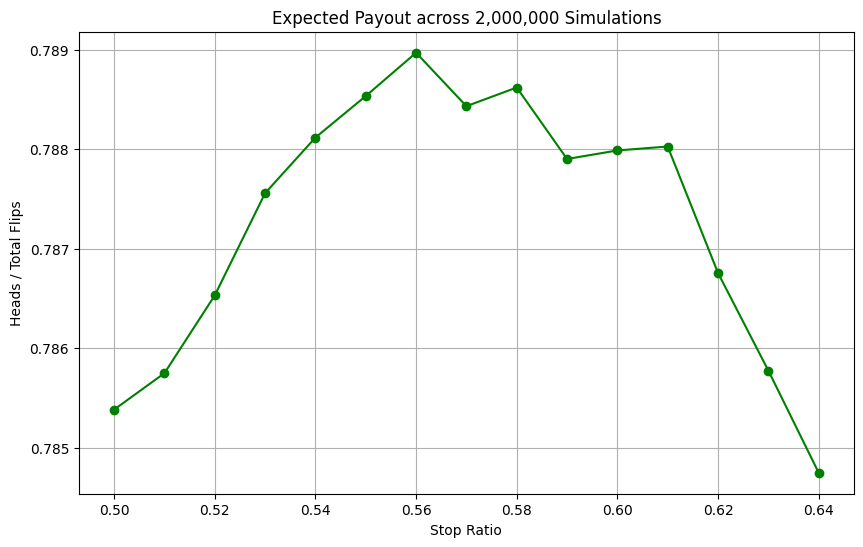

In [4]:
df_all_results['Expected Value'] =  df_all_results['Expected Payout'] - 0.75  # Adjusted Expected Value
df_all_results['Expected Payout'].plot(
    kind='line',
    figsize=(10, 6),
    marker='o',
    title=f'Expected Payout across {num_simulations:,} Simulations',
    xlabel='Stop Ratio',
    ylabel='Heads / Total Flips',
    color ='green'
)
plt.grid(True)
plt.show()

In [5]:
df_all_results

,Expected Payout,Expected Value
Stop Ratio,,
0.50,0.785382,0.035382
0.51,0.785749,0.035749
0.52,0.786531,0.036531
0.53,0.787559,0.037559
0.54,0.788118,0.038118
0.55,0.788536,0.038536
0.56,0.788972,0.038972
0.57,0.788434,0.038434
0.58,0.788622,0.038622


First, we can confirm that these results are reasonable. Our 'stop when heads > tails' strategy that we calculated earlier using pure mathematics is equivalent to a stop ratio of 0.5 heads / total flips. We can see that for 0.50 stop ratio our payout is modeled at about 0.7854, which is the exact value that we got when mathematically calculating its expected payout!

From these results, it appears the optimal stopping ratio is around 0.56, yielding an expected payout of about 0.789 heads/total flips. This is approximately equal to a profit of 3.9 cents per game played! This is slightly better than our previous strategy of stopping when heads first exceeds tails. The 3.9 cent profit per game is now an ROI of about 5.2% on each 75 cent wager.

### The Most Optimal Policy

Now we have figured out the optimal policy for the 'stop when heads/total flips > X' strategy. However, is there a better policy that could outperform stop when 'heads/total flips > X'?

In theory, yes. By creating some policy that scales stopping ratio by marginal variance per flip you could achieve better outcomes (think about this and try it out yourself). However, instead we will focus on a more theoretically interesting idea. 

But first as an aside, let's introduce potentially one of the coolest named theorems in probability: the Infinite Monkey Theorem ([link](https://en.wikipedia.org/wiki/Infinite_monkey_theorem)).

![Infinite Monkey Theorem](../../../media/Chimpanzee_seated_at_typewriter.jpg)

> The core idea of the infinite monkey theorem is a thought experiment. Let's say you have one monkey and have him sit down and randomly hit keys on a typewriter for an infinite amount of time. Given infinite time, the monkey will certainly type out any given possible text, including the complete works of Shakespeare.


Well, let's follow this logic for our coin flip game. Given infinite time, we would expect any sequence of heads and tails to eventually occur (if we never stop flipping). Obviously, in practice Python cannot model infinite time. However, a new policy appears when we consider this theorem. What if we simply only stop flipping when we reach a ratio of .999 repeated heads/total flips? While this may feel like a cop-out answer, it is in theory the optimal policy given we have infinite time to continue flipping the coin and never stop. If we truly can flip forever, or even simulate in some way infinite time, we would eventually reach a ratio of .999 repeated heads/total flips! This would give us a payout of 99.99 repeated cents, and a profit of 24.99 repeated cents per game played! This would be a massive ROI of 33.33 % repeated.   

## Findings

This analysis reveals that a seemingly unfavorable coin-flip game can be transformed into a profitable venture through the strategic application of optionality. The core finding is that by having the
   freedom to stop at any point, a player can devise
  a policy that systematically beats the game's
  apparent long-run expectation of a 50-cent payout.


   1. Analytical Solution:

We first established a
      baseline profitable strategy: stopping the game
      the first time the number of heads exceeds the
      number of tails. Using combinatorics and the
      properties of Catalan numbers, we analytically
      derived the expected payout for this strategy to
      be exactly π/4 ≈ 0.7854. With a cost of 0.75,
      this yields a positive expected value of
      approximately 3.54 cents per game.

   2. Numerical Optimization:
   
Through large-scale Monte
      Carlo simulations (2 million runs), we refined
      this approach by testing various static stopping
      thresholds. The simulations confirmed our
      analytical result and identified a more optimal
      policy: stopping only when the ratio of heads to
      total flips exceeds 0.56. This optimized policy
      increases the expected payout to approximately
      0.789, boosting the expected profit to 3.9 cents
      per game and achieving a return on investment of
      over 5%.

   3. The Value of Optionality:

The essential insight is
       that the player's ability to choose when to stop
      provides a significant edge. While the long-term
      probability of heads is 50%, the player can
      selectively end the game during periods of
      favorable short-term variance, thereby capturing a
       payout greater than the underlying average.


## Future Work
The strategies explored in this article, while
  profitable, are based on a static stopping rule.
  This opens the door to several avenues for more
  advanced research and optimization.

   1. Dynamic Stopping Policy:
 
 The primary limitation of
       the current model is its use of a constant
      stopping ratio. A more sophisticated approach
      would be to implement a dynamic policy where the
      decision to stop or continue depends on the
      current state of the game (i.e., the number of
      heads and the total number of flips). For
      instance, a 52% ratio after 1,000 flips is far
      more statistically significant and secure than a
      52% ratio after only 25 flips. 

   2. Analysis with a Biased Coin:

The analysis could be
       extended to scenarios involving a biased coin
      (where P(Heads) ≠ 0.5). This would require
      recalculating the expected values and likely shift
       the optimal stopping thresholds, providing
      insight into how the strategy adapts to different
      underlying probabilities.

   3. Risk-Adjusted Strategies: 
   
The current work focuses
       exclusively on maximizing expected value. A
      real-world player might be risk-averse and prefer
      a strategy that, for example, maximizes the
      probability of breaking even or minimizes the
      chance of a significant loss. Future analysis
      could incorporate utility theory to develop
      strategies that align with different risk
      profiles.

   4. Exploring Different Payout Structures:
   
How would
      the optimal strategy change if the casino altered
      the payout function? Investigating non-linear
      payouts (e.g., (heads/total_flips)^2) or
      introducing different cost structures would test
      the robustness of our findings and lead to more
      generalized solutions for this class of
      optionality-based games.
---
These are just some initial thoughts by me and I am open to discussion. As always, feel free to reach out to [me](mailto:jcp@joshpearlson.com) for suggestions on future articles or comments. 


